<center><h1><strong><font color="blue">Case Study : Metric & High-Performance Data Science</font></strong></h1></center>
<img alt="" src="GitHub/eLearning/images/covers/cover_ui-n-taudata.jpg"/>

# Kelompok D
## Group Kasus Jarak dan Pemrograman Paralel D

Anggota Kelompok:

- Ester Oktafia (2206810830) -> Manhattan

- Adristi Salsabila Putri Pamungkas (2206053991) -> Nomor 2

- Herardita Cahyaning Wulan (2006568632) -> Chebysev

- Muhammad Amir Rizki Hidayat (2206051651) -> -

- Hanifiyya Dyah Pitaloka Wangsapraja (2206027236) -> Canberra

Diberikan program serial k-NN untuk memprediksi (test) data menggunakan jarak Euclidean seperti dibawah ini. Tugas anda adalah:

1. Bandingkan performa model dengan 3 rumus jarak lainnya: [Manhattan, Chebysev, dan Canberra]

2. Menggunakan Thread Programming dan-atau Pemrograman Parallel (10-fold CV seperti contoh serial) tingkatkan efisiensi waktu code dibawah. Gunakan 1 cell terpisah agar bisa di cek via "terminal" sebagaimana yang kita lakukan di kuliah.

Catatan:

- Program dapat di "Run" (di terminal) Error Free.
- Kelompok dengan performa waktu terbaik mendapatkan tambahan nilai UAS +10/100 untuk seluruh anggota kelompoknya.
- Keputusan dosen untuk kelompok terbaik bersifat final.
- Kelompok dapat dilihat di Emas2
- Jawaban dikirimkan via email dengan deadline submission Jum'at, 23 November 2023 Jam 12:00
- Subject: "Studi Kasus Komputasi Statistika Metrics & HPDS Ganjil 2023 - Kelompok XYZ"
- Isi eMail: nama & NIM seluruh Anggota
- File ipynb di attach/lampirkan di email dengan nama file : Kasus-Metrics-HPDS-Kelompok-XYZ.ipynb
- Pengerjaan dapat dilakukan sejak diterimanya file ini.

In [25]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm, time
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
plt.style.use('bmh'); sns.set()

"Done"

'Done'

In [26]:
try: # Try Local Load
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
except: # Download data from taudata GitHub (dijalankan di Google Colab)
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-train.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-test.csv
    # Anda juga bisa unduh data dengan menggunakan URL diatas.
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
print(train.shape, test.shape)
print(train.info())
train.head()

(250, 3) (250, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      250 non-null    float64
 1   x2      250 non-null    float64
 2   y       250 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.0 KB
None


,x1,x2,y
0,-0.835291,3.576690,0
1,1.323524,4.229088,0
2,-1.373580,2.729440,3
3,0.852342,2.603071,0
4,3.321460,2.198889,0


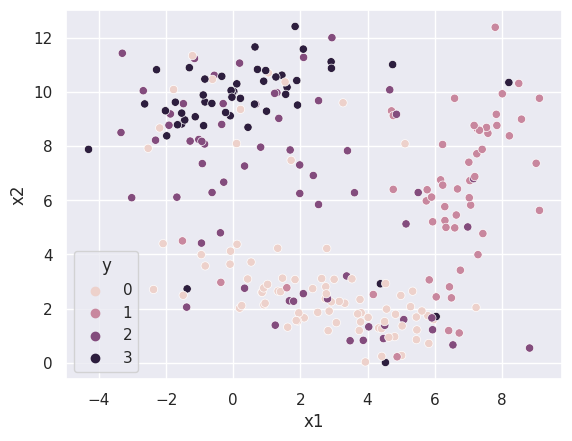

In [27]:
p = sns.scatterplot(x=train.x1, y=train.x2, hue = train.y)

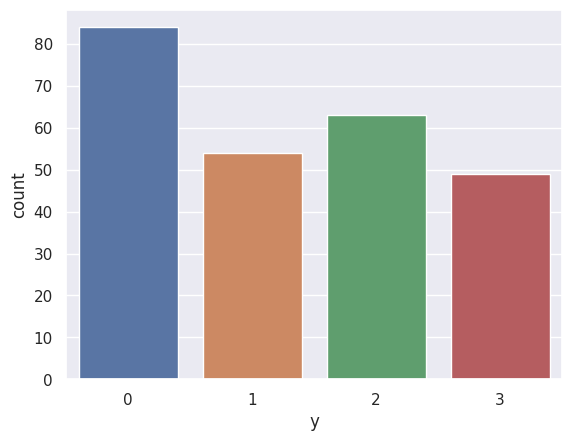

In [28]:
p= sns.countplot(x=train.y)

In [29]:
def getNeighbour(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 2)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [30]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbour(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.716, Variansi Akurasi = 0.0


,waktu,label
0,83.528873,serial
1,81.249662,serial
2,73.888417,serial
3,73.490799,serial
4,73.672921,serial


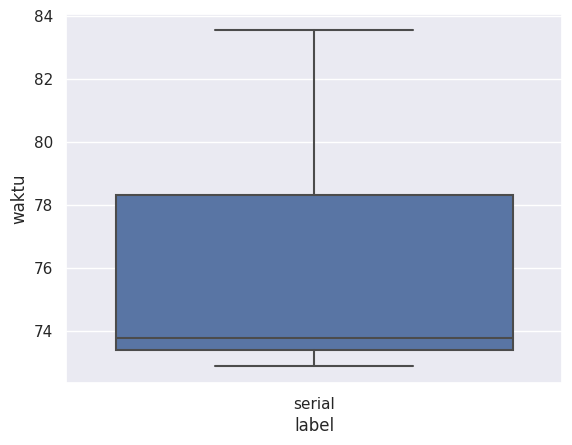

In [31]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

# Nomor 1

## Manhattan

In [32]:
def getNeighbourManhattan(data, observasi, k):

# Menghitung jarak Manhattan dan mengembalikan k tetangga terdekat.
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        # Menghitung jarak Manhattan dengan p=1
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 1)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}  # Inisialisasi dictionary untuk menyimpan hasil waktu dan label
akurasi = []  # Inisialisasi list untuk menyimpan hasil akurasi

for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []

    # Iterasi melalui setiap observasi pada dataset pengujian (test)
    for i, d in test.iterrows():
        tetangga = getNeighbourManhattan(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])

    waktu = time.time() - mulai  # Menghitung waktu eksekusi
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))  # Menghitung akurasi
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

# Menampilkan rata-rata dan variansi akurasi hasil pengujian
print("Rata-rata akurasi Manhattan = {}, Variansi Akurasi Manhattan = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)

hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi Manhattan = 0.708, Variansi Akurasi Manhattan = 0.0


,waktu,label
0,73.781354,serial
1,75.473651,serial
2,73.774956,serial
3,74.268359,serial
4,74.597698,serial


In [33]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Manhattan = {} ".format(avgtime))

Rata-rata waktu running Manhattan = 74.21160345077514 


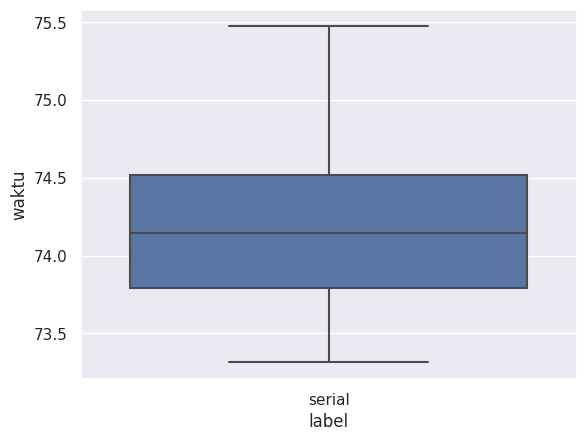

In [34]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

## Chebyshev

In [35]:
# Menghitung jarak Chebysev dan mengembalikan k tetangga terdekat.
def getNeighbourChebyshev(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.chebyshev(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourChebyshev(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

# Menampilkan rata-rata dan variansi akurasi hasil pengujian
print("Rata-rata akurasi Chebyshev = {}, Variansi Akurasi Chebyshev = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi Chebyshev = 0.736, Variansi Akurasi Chebyshev = 0.0


,waktu,label
0,73.071562,serial
1,72.267715,serial
2,72.824669,serial
3,72.827567,serial
4,72.847769,serial


In [36]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Chebyshev = {} ".format(avgtime))

Rata-rata waktu running Chebyshev = 73.08121361732483 


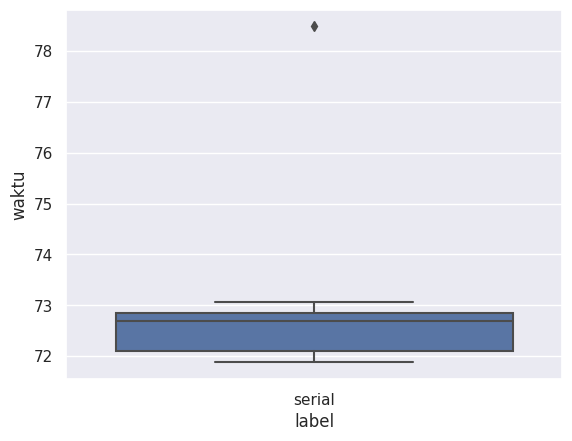

In [37]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

## Canberra

In [38]:
# Menghitung jarak Canberra dan mengembalikan k tetangga terdekat.
def getNeighbourCanberra(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.canberra(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourCanberra(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

# Menampilkan rata-rata dan variansi akurasi hasil pengujian
print("Rata-rata akurasi Canberra = {}, Variansi Akurasi Canberra = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi Canberra = 0.712, Variansi Akurasi Canberra = 0.0


,waktu,label
0,86.295305,serial
1,78.188457,serial
2,78.099216,serial
3,77.748462,serial
4,78.990003,serial


In [39]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Canberra = {} ".format(avgtime))

Rata-rata waktu running Canberra = 78.53562664985657 


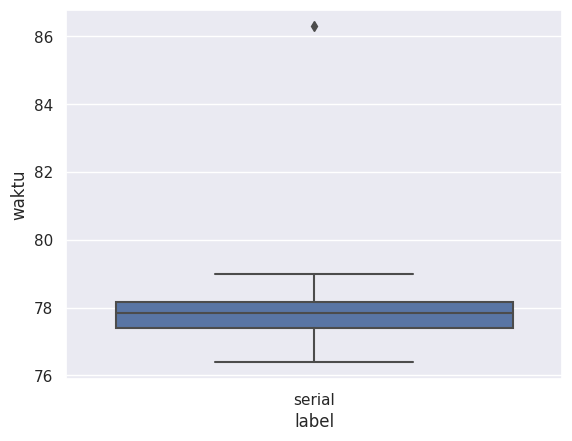

In [40]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

### Kesimpulan

Kami membuat perbandingan 3 model dengan 3 rumus jarak yang berbeda yaitu Manhattan, Chebysev, dan Canberra. Untuk data yang digunakan, didapatkan hasil masing-masing model sebagai berikut:
- **Rata-rata akurasi tertinggi**, yaitu 0.736 oleh **model dengan rumus jarak Chebyshev**. Kemudian model dengan rumus jarak Canberra 0.712. Rata-rata akurasi terendah yaitu 0.708 menggunakan model dengan rumus jarak Manhattan.
- **Rata-rata running time tercepat**, yaitu 73.0812 oleh **model dengan rumus jarak Chebyshev**. Kemudian model dengan rumus jarak Manhattan yaitu 74.2116. Rata-rata running time terlambat yaitu 78.5356 oleh model dengan rumus jarak Canberra.


Kesimpulannya untuk data yang digunakan, didapat hasil model terbaik adalah model dengan rumus jarak Chebyshev, dengan memberikan akurasi tertinggi dan urutan rata-rata running time tercepat.

# Nomor 2

In [41]:
#cross validation to estimate how accurately a predictive model will perform
def crossval_manhattan(fold = 10, k = 5):
  akurasi = []  # Inisialisasi variabel akurasi di dalam fungsi
  for cv in range(fold):
    prediksi = []
    for i, d in test.iterrows():
      tetangga = getNeighbourManhattan(train, d, k)
      prediksi.append(tetangga.y.mode().values[0])
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
  return akurasi

def crossval_chebyshev(fold = 10, k = 5):
  akurasi = []  # Inisialisasi variabel akurasi di dalam fungsi
  for cv in range(fold):
    prediksi = []
    for i, d in test.iterrows():
      tetangga = getNeighbourChebyshev(train, d, k)
      prediksi.append(tetangga.y.mode().values[0])
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
  return akurasi

def crossval_canberra(fold = 10, k = 5):
  akurasi = []  # Inisialisasi variabel akurasi di dalam fungsi
  for cv in range(fold):
    prediksi = []
    for i, d in test.iterrows():
      tetangga = getNeighbourCanberra(train, d, k)
      prediksi.append(tetangga.y.mode().values[0])
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
  return akurasi

In [45]:
from threading import Thread
if __name__ == "__main__":
  t1 = Thread(target =crossval_manhattan)
  t2 = Thread(target=crossval_chebyshev)
  t3 = Thread(target =crossval_canberra)
  start_time = time.time()
  t1.start()
  t1.join()
  end_time = time.time()
  print("Parallel time manhattan=", end_time - start_time)
  start_time = time.time()
  t2.start()
  t2.join()
  end_time = time.time()
  print("Parallel time chebyshev=", end_time - start_time)
  start_time = time.time()
  t3.start()
  t3.join()
  end_time = time.time()
  print("Parallel time canberra=", end_time - start_time)

Exception in thread Thread-29 (crossval_manhattan):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-41-86347f91314c>", line 7, in crossval_manhattan
  File "<ipython-input-32-61ddacf08afa>", line 4, in getNeighbourManhattan
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3980, in __setitem__
    self._set_item(key, value)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4187, in _set_item
    self._set_item_mgr(key, value)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4146, in _set_item_mgr
    self._iset_item_mgr(loc, value)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4136, in _iset_item_mgr
    self._mgr.iset(loc, value, inplace=inplace)
  File "/usr/local/lib/python3

Parallel time manhattan= 0.02136397361755371
Parallel time chebyshev= 0.016226530075073242
Parallel time canberra= 0.017451047897338867


### Kesimpulan
* NameError: name 'test' is not defined:

  Terjadi kesalahan NameError yang mengindikasikan bahwa variabel test tidak didefinisikan di dalam fungsi-fungsi cross-validation. Hal ini perlu diperbaiki dengan memastikan variabel test dapat diakses di dalam fungsi-fungsi tersebut.

* Parallel Execution Time:

  Waktu eksekusi untuk metode Manhattan adalah 0.0213 detik, Chebyshev adalah 0.0162 detik, dan Canberra adalah 0.01745 detik.
  Menurut hasil percobaan kami, model tercepat menggunakan metode Chebyshev.